# House Price Prediction using Regression Techniques

## Abstract : 

- The housing dataset is available on Kaggle, under "House Prices: Advanced Regression Techniques". 
- The "train.csv" file contains the training data and "test.cv" contains the testing data.
- The training data contains data for 1460 rous.hichsomespondstenlA6l house's data and 80 columns which correspond to the feature of those houses. Similarly, the testing data contains data of 1461 houses and their 79 attributes.

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.linear_model import LinearRegression

## Import Data

In [2]:
df = pd.read_csv("train.csv") ## reading data
print(f"shape : {df.shape}")
df.head()

shape : (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
# summary statistics of character column
 
print(df.describe(include=['object']))

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [5]:
print(df.describe(include='all'))

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

- We have total 1460 house data with 81 features.

In [6]:
df.info() ## getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset is a mix of categorical, and numerical columns.

In [7]:
## segregated data based on numerical and categorical columns
categorical = ['MSSubClass', 'MSZoning','Street','Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
               'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
               'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical',
               'LowQualFinSF','BedroomAbvGr','KitchenAbvGr','KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd',
               'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature','MiscVal',
               'MoSold', 'YrSold', 'SaleType','SaleCondition']

numerical = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'GarageArea', 
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
             'GrLivArea', 'MasVnrArea','2ndFlrSF','1stFlrSF','LowQualFinSF']

## Output Label Analysis

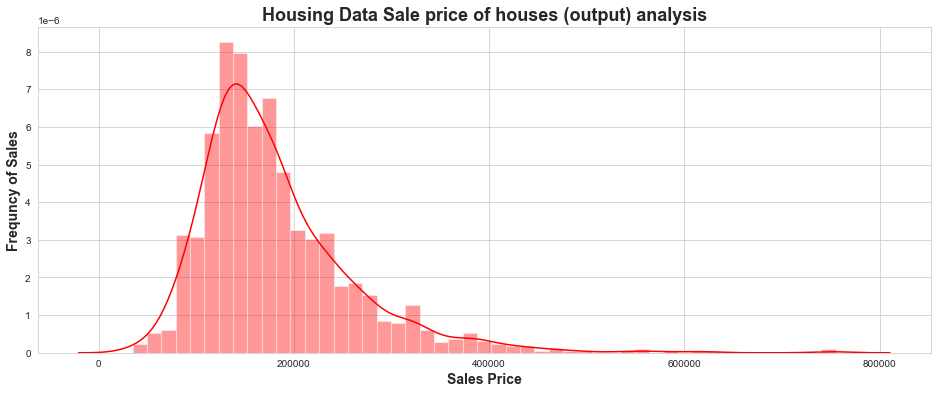

In [8]:
## checking the distribution plot of the sales price
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
output_plot = sns.distplot(df['SalePrice'], color ="red")
plt.title("Housing Data Sale price of houses (output) analysis", fontweight="bold", fontsize=18)
plt.xlabel('Sales Price',fontweight="bold",fontsize=14)
plt.ylabel("Frequncy of Sales",fontweight="bold",fontsize=14)
plt.show()

In [9]:
print("Skewness: %f" %df['SalePrice'].skew())
print("Kurtosis: %f" %df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- The output column is a right skewed data with an elongated tail.

## Data Cleaning

### null value analysis

In [10]:
def null_df(df):
    """
    This function geenrates all the null values counts in a dataframe from a given dataframe.
    """
    count = df.isnull().sum() #getting missing value counts
    percnt = 100 * ((df.isnull().sum()) / (df.shape[0])) #getting missing value percentage
    #creating dataframe and renaming column
    tb = pd.concat([count, percnt], axis=1).rename(columns = {0:"count", 1:"percnt"})
    tb = tb[tb['count'] != 0]
    return tb.sort_values("count", ascending=False).round(3)

In [11]:
print(f"missing df shape : {null_df(df).shape}")
null_df(df).T

missing df shape : (19, 2)


PoolQC  MiscFeature     Alley     Fence  FireplaceQu  LotFrontage  \
count   1453.000     1406.000  1369.000  1179.000       690.00       259.00   
percnt    99.521       96.301    93.767    80.753        47.26        17.74   

        GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond  \
count       81.000       81.000        81.000      81.000      81.000   
percnt       5.548        5.548         5.548       5.548       5.548   

        BsmtExposure  BsmtFinType2  BsmtFinType1  BsmtCond  BsmtQual  \
count         38.000        38.000        37.000    37.000    37.000   
percnt         2.603         2.603         2.534     2.534     2.534   

        MasVnrArea  MasVnrType  Electrical  
count        8.000       8.000       1.000  
percnt       0.548       0.548       0.068

##### There are total 19 columns where missing values are present, out of which 5 columns are almost 50% or more than missing values.

### null value imputation and removal

In [12]:
## dropping more than 50% null value column
df1 = df.drop(columns = null_df(df).T.columns[0:5])
print(f"shape df1 {df1.shape}")

shape df1 (1460, 76)


In [13]:
## replacing numerical columns with median value
num_col = {"LotFrontage", "MasVnrArea"}
for col in num_col:
    df1[col] = df1[col].fillna(df1[col].median())

In [14]:
## replacing categorical columns with mode value
cat_col = set(null_df(df1).T.columns) - {"LotFrontage", "MasVnrArea"}
for col in cat_col:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

In [15]:
null_df(df1) ## sanity check

Empty DataFrame
Columns: [count, percnt]
Index: []

### duplicate data count

In [16]:
df1[df1.duplicated()] ## checking for duplicate data

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

## Outlier Detection

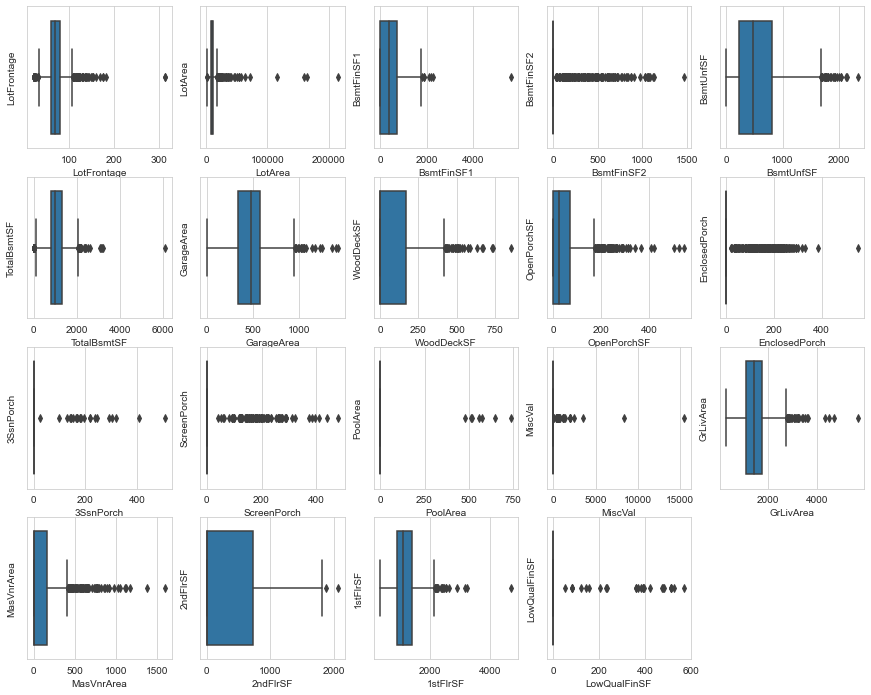

In [17]:
figure = plt.figure(figsize=(15,12))
for idx, col in enumerate(numerical):
    plt.subplot(4, 5, idx+1)
    plot = sns.boxplot(df1[col])
    plt.ylabel(col)
plt.show()

- from above analysis we can say that most of the features have outliers. 
- The features like PoolArea and Porch has majority values as 0. This is because these houses doesn't have those facilities, so it is given as zero. 

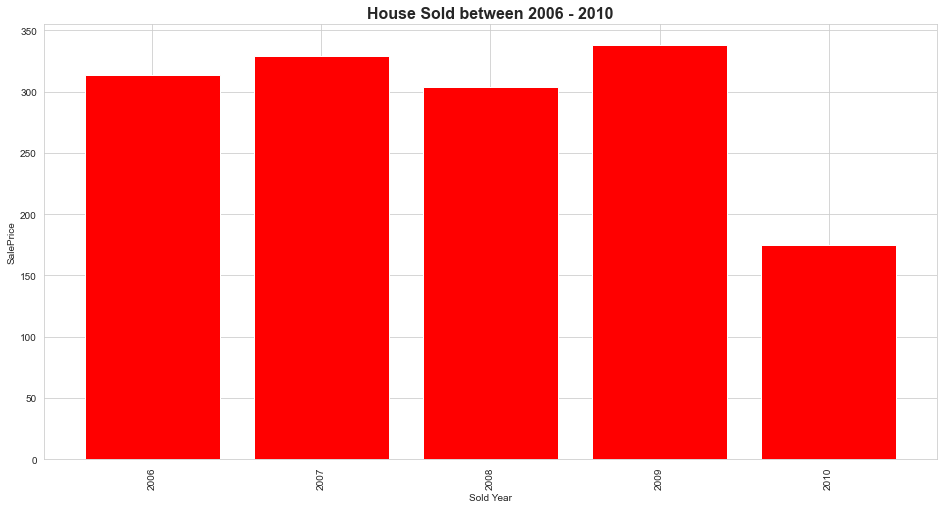

In [18]:
## checking neighbourhood with number of overall quality of the house
f, ax = plt.subplots(figsize = (16,8))
#df_temp = df.sort_values(["YrSold", "SalePrice"])
df_temp1 = df.groupby("YrSold")["SalePrice"].count().reset_index()
plt.bar(df_temp1["YrSold"], df_temp1["SalePrice"], color = "red")
plt.title("House Sold between 2006 - 2010",fontweight='bold', fontsize=16)
plt.xlabel("Sold Year")
plt.ylabel("SalePrice")
plt.xticks(rotation = 90)
plt.show()

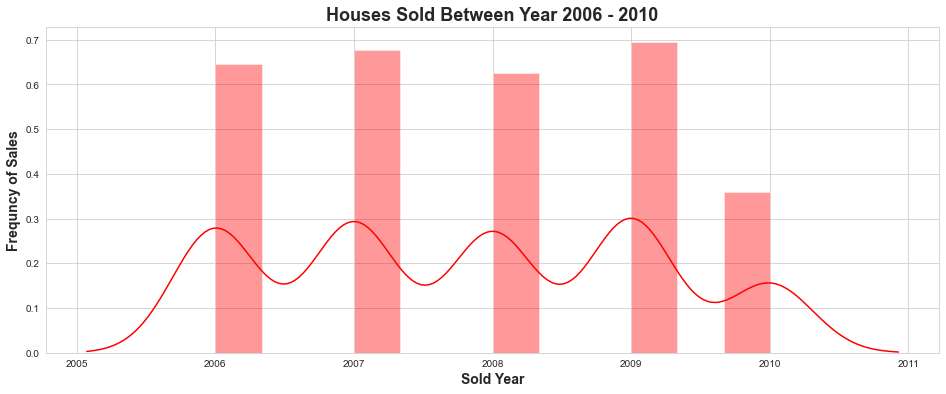

In [19]:
## checking the distribution plot of the sales price
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
output_plot = sns.distplot(df['YrSold'], color ="red")
plt.title("Houses Sold Between Year 2006 - 2010", fontweight="bold", fontsize=18)
plt.xlabel('Sold Year',fontweight="bold",fontsize=14)
plt.ylabel("Frequncy of Sales",fontweight="bold",fontsize=14)
plt.show()

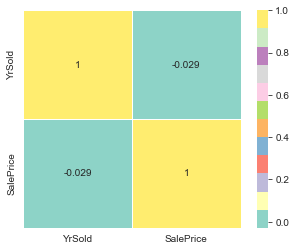

In [20]:
corr_age_pace = df[["YrSold", "SalePrice"]].dropna().corr()
plot = sns.heatmap(corr_age_pace, square = True, linewidths = .5, annot = True, cmap = 'Set3') 

In [21]:
import plotly.express as px
fig = px.scatter(df1, x='SalePrice', y='YrSold', size='SalePrice',color='YrSold', width=1000, height=600)
fig.update_layout(showlegend=False, title={'text':'Houses Sold Between Year 2006 - 2010','x':0.5,'xanchor':'center'})
fig.show()

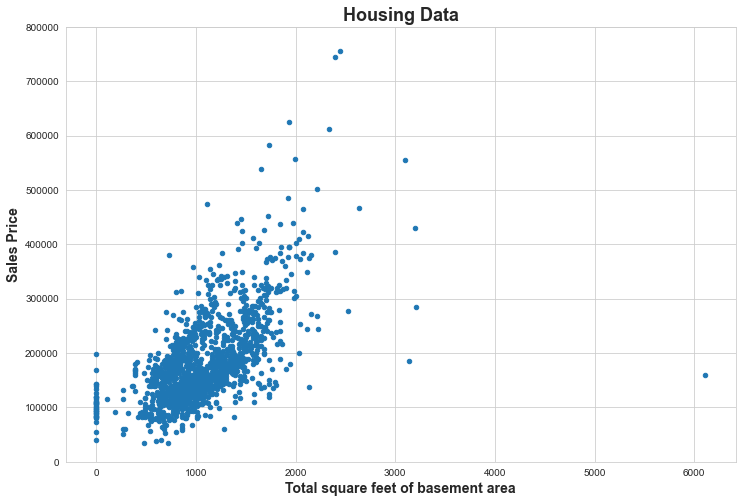

In [22]:
#scatter plot TotalBsmtSF/saleprice
sns.set_style("whitegrid")
var = "TotalBsmtSF"
data = pd.concat([df1[var], df1["SalePrice"]], axis = 1)
data.plot.scatter(x = var, y = "SalePrice", ylim = (0,800000))
plt.title("Housing Data",fontweight="bold", fontsize=18)
plt.xlabel('Total square feet of basement area',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)
plt.gcf().set_size_inches((12, 8)) 
plt.show()

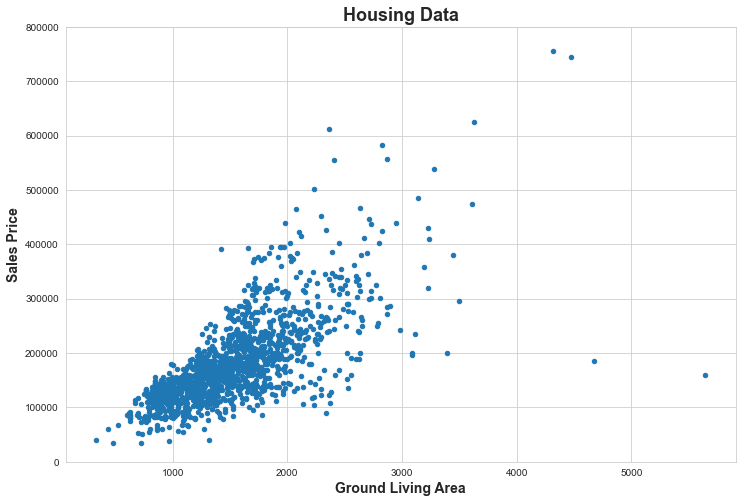

In [23]:
## checking outliers in Ground living area column with price value as this is one of the important features 
sns.set_style("whitegrid")
var = "GrLivArea"
data = pd.concat([df1[var], df1["SalePrice"]], axis = 1)
data.plot.scatter(x = var, y = "SalePrice", ylim = (0,800000))
plt.title("Housing Data",fontweight="bold", fontsize=18)
plt.xlabel('Ground Living Area',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)
plt.gcf().set_size_inches((12, 8)) 
plt.show()

##### there are outliers present in the above code as we can see 4 points are different from the usual cluster.

In [24]:
## remove 4 outliers which is sale price more than 700000 and living area more than 4000
indx_outliers = df1[(df1['GrLivArea'] >4000) | (df1['SalePrice'] > 700000)].index
df2 = df1.iloc[df1.index.drop(indx_outliers)]
print(f"shape after dropping outlier : {df2.shape}")

shape after dropping outlier : (1456, 76)


## Box Plot Analysis for categorical data

### OverallQual

Text(0, 0.5, 'Sales Price')

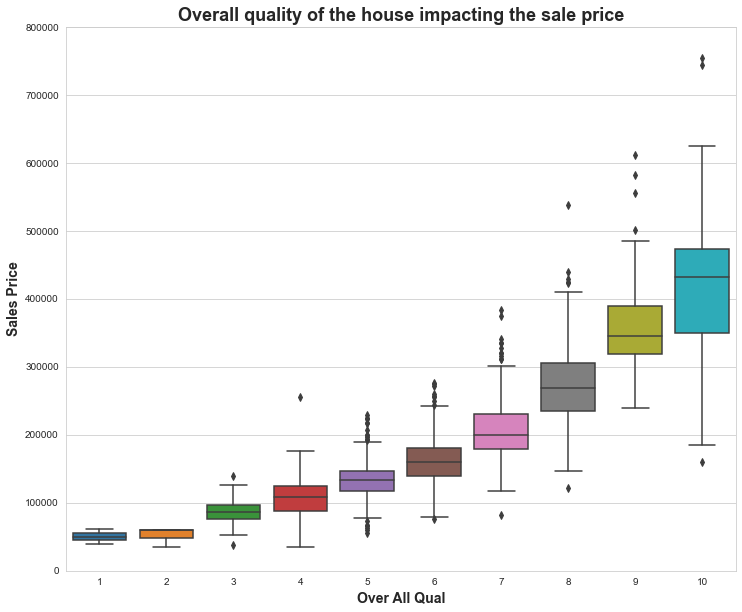

In [25]:
#box plot overallqual/saleprice
var = "OverallQual"
data = pd.concat([df1[var], df1["SalePrice"]], axis = 1)
f, ax = plt.subplots(figsize = (12,10))
fig = sns.boxplot(x = var, y = "SalePrice", data=data)
fig.axis(ymin = 0, ymax = 800000);
plt.title("Overall quality of the house impacting the sale price",fontweight="bold", fontsize=18)
plt.xlabel('Over All Qual',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)

##### There is an obvious correlation of saleprice with overall quality of the house. the best the quality the best the saleprice.

### OverallCond

Text(0, 0.5, 'Sales Price')

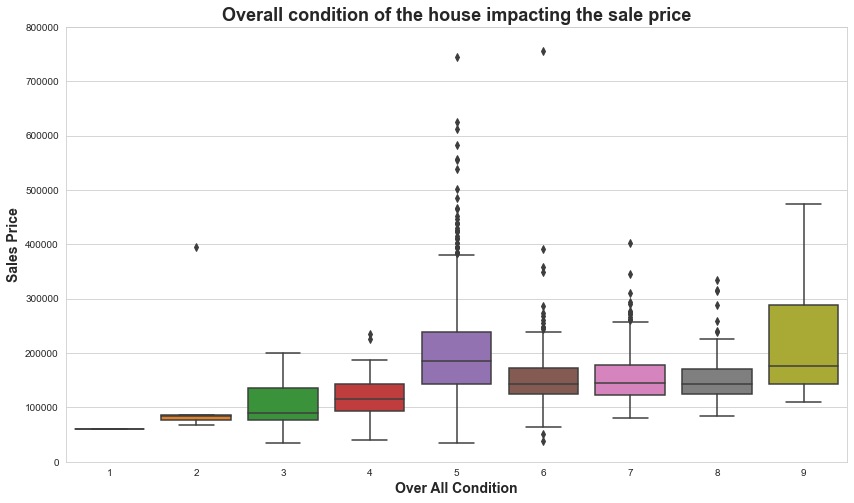

In [26]:
#box plot overallqual/saleprice
var = "OverallCond"
data = pd.concat([df1[var], df1["SalePrice"]], axis = 1)
f, ax = plt.subplots(figsize = (14,8))
fig = sns.boxplot(x = var, y = "SalePrice", data=data)
fig.axis(ymin = 0, ymax = 800000);
plt.title("Overall condition of the house impacting the sale price",fontweight="bold", fontsize=18)
plt.xlabel('Over All Condition',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)

##### Overall condition has less impact to the sales price.

### YearBuilt 

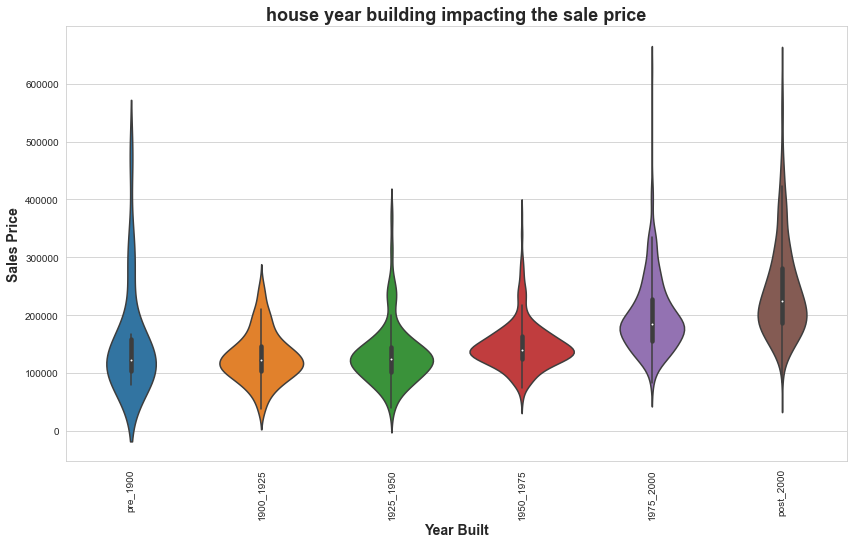

In [27]:
## creating bin for year built
f, ax = plt.subplots(figsize = (14,8))
df_temp = df2.copy()
df_temp['YearBuilt_bin'] = pd.cut(df_temp['YearBuilt'], bins=[1850,1900, 1925, 1950, 1975, 2000, 2021], 
                              labels=['pre_1900', '1900_1925', '1925_1950', 
                                      '1950_1975', '1975_2000', 'post_2000'])

sns.violinplot(x="YearBuilt_bin", y="SalePrice", data=df_temp)

plt.title("house year building impacting the sale price", fontweight="bold", fontsize=18)
plt.xlabel('Year Built',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)
plt.xticks(rotation = 90)
plt.show()

##### there is a small pattern can be observed here. The newer the house built, the probability of sale price is also high.

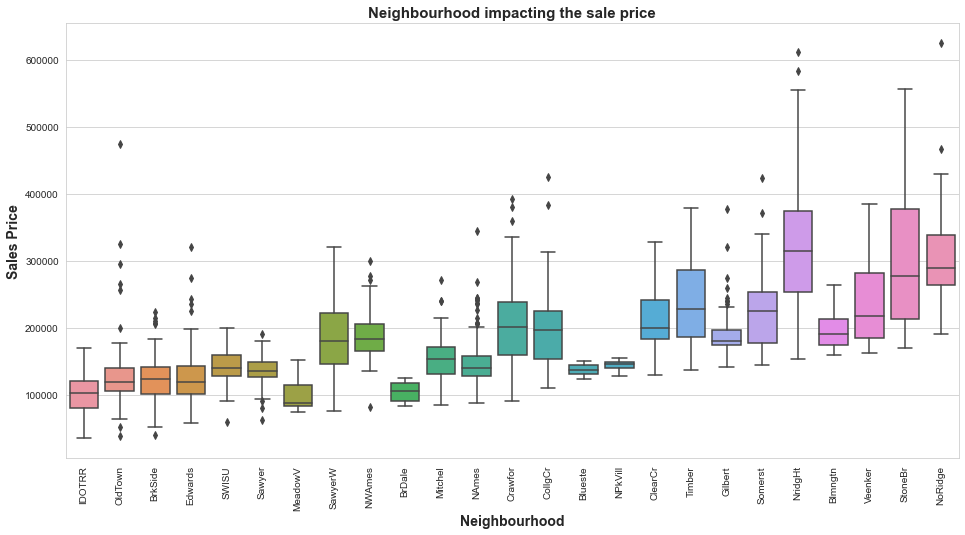

In [28]:
df_temp = df2.sort_values(["SalePrice", "Neighborhood"])
plt.figure(figsize=(16,8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_temp)
plt.xticks(rotation = 90)
plt.title("Neighbourhood impacting the sale price", fontweight="bold", fontsize=15)
plt.xlabel('Neighbourhood',fontweight="bold",fontsize=14)
plt.ylabel("Sales Price",fontweight="bold",fontsize=14)
plt.show()

#### The neighhourhood present in the dataset has also showing a mild trend.  Neighbourhood with "NoRidge", "StoneBr", and "NridgHt" has highest sale price of the house.

In [29]:
## checking neighbourhood with number of overall quality of the house
f, ax = plt.subplots(figsize = (16,8))
df_temp1 = df_temp.groupby("Neighborhood")["OverallQual"].count().reset_index()
plt.bar(df_temp1["Neighborhood"], df_temp1["OverallQual"], color = "red")
plt.title("total house present in each neighbourhood", fontsize=15)
plt.xlabel("neighbourhood")
plt.ylabel("count")
plt.xticks(rotation = 90)
plt.show()

##### It seems NAmes has the highest number of houses present in it, where as Blueste, and Veenker has less data.

### saleCondition

In [30]:
piedf=pd.DataFrame(df2["SaleCondition"].value_counts())
piedf["Conditions"] = piedf.index
fig = px.pie(piedf, values="SaleCondition", names='Conditions', title ='sale condition during the sale of the house' )
fig.show()

##### very less percentage of houses were sold with an alloca and adjland way. partial and Abnormal way of sale consists of 12%.

## numerical data analysis

In [31]:
figure = plt.figure(figsize=(20,17))
for idx, col in enumerate(numerical):
    plt.subplot(5, 4, idx+1)
    plot = sns.distplot(df1[col], color = "indigo")
plt.show()

#### non of the features following any kind of normality in the dataset present.

## Correlation

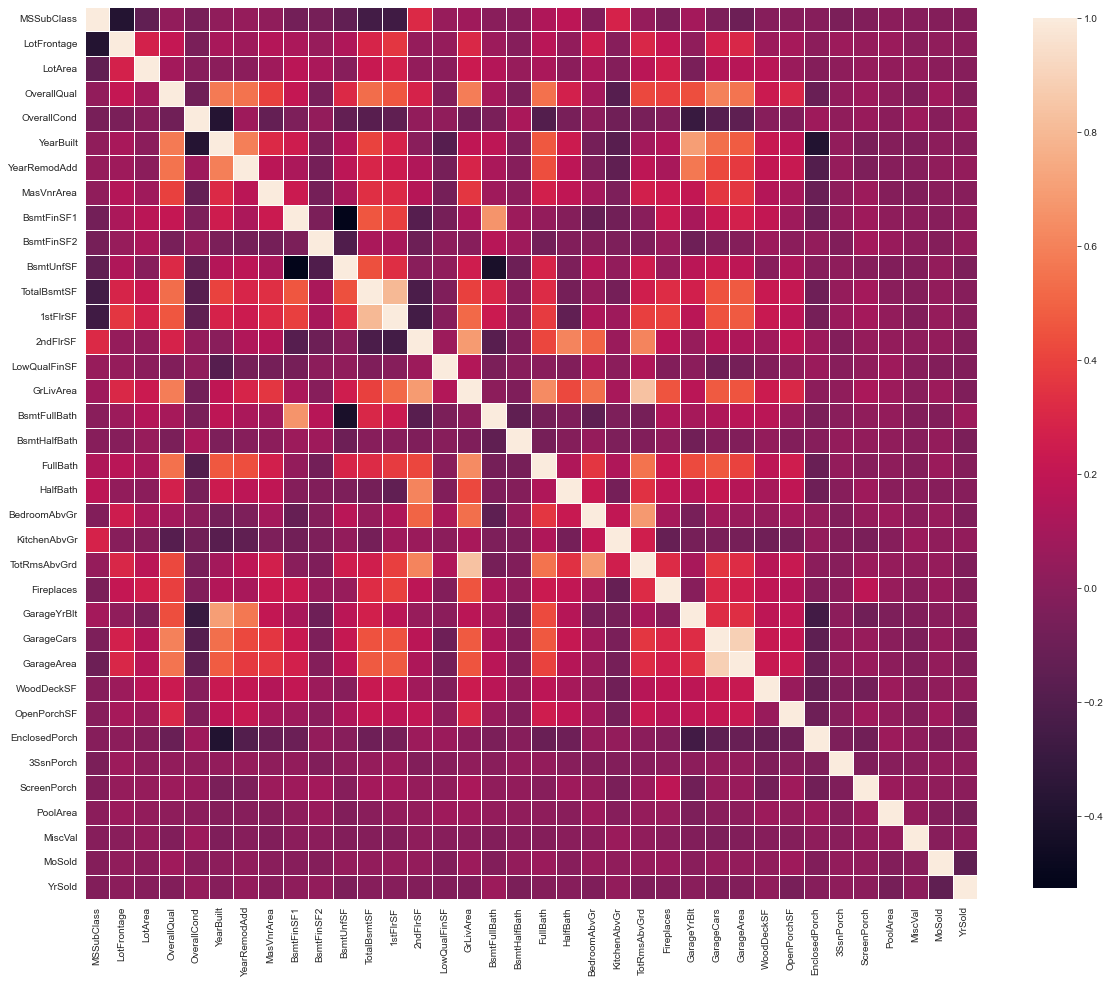

In [32]:
fig = plt.figure(figsize=(20,20)) ## setting up figure size

## heatmap for correation analysis
sns.heatmap(df2.iloc[:,1:-1].corr(), square = True, 
            linewidths = .5, cbar_kws = {"shrink":0.8}, 
            annot = False) 
plt.show()

##### the above code is not much clear from the values point of view.

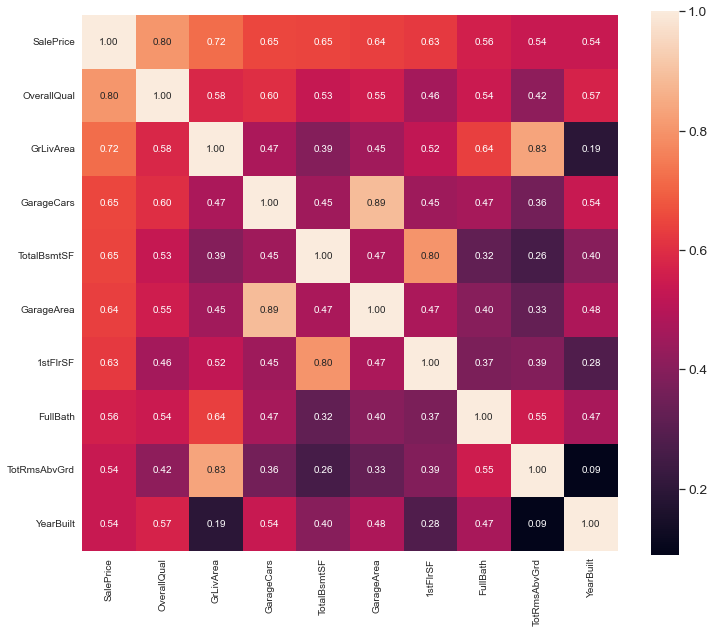

In [33]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12,10))
k = 10
cols = corrmat.nlargest(k, 'SalePrice')["SalePrice"].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True, square=True, fmt='.2f',annot = True, annot_kws={'size' : 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
## source code : - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [35]:
corr_data = get_top_abs_correlations(df2.iloc[:,1:-1].corr(), n=16)
corr_data

GarageCars    GarageArea      0.988439
TotalBsmtSF   1stFlrSF        0.957618
GrLivArea     TotRmsAbvGrd    0.952131
YearBuilt     GarageYrBlt     0.927280
BsmtFinSF1    BsmtFullBath    0.891284
OverallQual   GarageCars      0.890360
YearBuilt     YearRemodAdd    0.871268
YearRemodAdd  GarageYrBlt     0.868535
OverallQual   GarageArea      0.861782
BedroomAbvGr  TotRmsAbvGrd    0.855147
OverallQual   YearBuilt       0.831756
GrLivArea     FullBath        0.828727
OverallQual   YearRemodAdd    0.822785
              FullBath        0.817999
2ndFlrSF      HalfBath        0.814939
YearBuilt     GarageCars      0.809057
dtype: float64

##### the above features are the most common multicollinearity.
##### The big one is GarageCars and GarageArea. This is obvious that if the garage space is high then the car space will be good.

In [36]:
## dropping selected multi collinear features from the model
multi_corr = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'YearRemodAdd']
df3 = df2.drop(columns = multi_corr)
print(f"shape after multi corr dropped : {df3.shape}")

shape after multi corr dropped : (1456, 72)


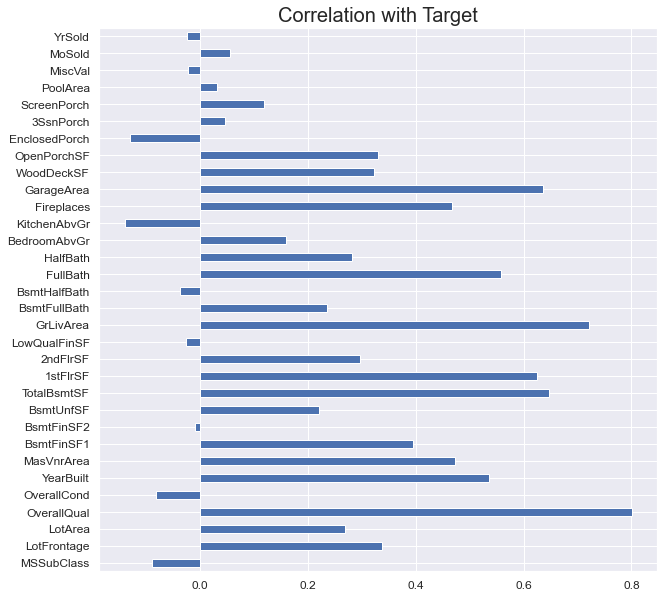

In [37]:
## checking correation with output data
plot = df3.iloc[:,1:-1].corrwith(df3["SalePrice"]).plot.barh(figsize =(10,10), fontsize=12)
plt.title('Correlation with Target', fontsize = 20)
plt.show()

##### overQuality and GrLivArea are the highly correlated features with the output class.

In [38]:
train = pd.read_csv("train.csv") ## reading data
test = pd.read_csv("test.csv") ## reading data
# Moving the train without the Saleprice column.
X = pd.DataFrame(train.loc[:, train.columns != 'SalePrice'])
# Here I am using concat to add the testing data to the train data.
X = pd.concat([X, test], axis=0)
# Creating the Y for train test split.
y = pd.DataFrame(train['SalePrice'])
# Filling in these features with "No", which means they do not have this feature.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley', 'PoolQC'):
  X[col] = X[col].fillna('No')

# Filling these features with zeros
for col in ('GarageArea', 'GarageCars'):
  X[col] = X[col].fillna(0)

# Filling these features with the mode.
for col in ('MSZoning', 'Utilities', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'SaleType'):
  X[col] = X[col].fillna(X[col].mode()[0])

# The rest of the data I am filling in with the median
X.fillna(X.median(), inplace=True)

## Feature Engineering

In [39]:
# Adding new features to the dataset by using the original features
X['AllSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['BackyardSF'] = X['LotArea'] - X['1stFlrSF']
X['PorchSF'] = X['WoodDeckSF'] + X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch'] 
X['Total_Bathrooms'] = X['FullBath'] + X['BsmtFullBath'] + (.5 * X['HalfBath']) + (.5 * X['BsmtHalfBath'])
X['MedNhbdArea'] = X.groupby('Neighborhood')['GrLivArea'].transform('median')
X['IsAbvGr'] = X[['MedNhbdArea', 'GrLivArea']].apply(lambda x: 'yes' if x['GrLivArea'] > x['MedNhbdArea'] else 'no', axis=1)

# Scaling - Encoding - Transforming

In [40]:
scale = ['MedNhbdArea', 'BackyardSF', 'PorchSF', 'WoodDeckSF', 'OpenPorchSF','AllSF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','GarageArea','GrLivArea','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','TotalBsmtSF','PoolArea']

encode = list(set(X.columns) - set(scale) - set(['Id']))

# Working with the skew
skew_feats = X[scale].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats.astype('float')})
skewness = skewness[(skewness.Skew > .75)]
indeces = list(skewness.index)

# Why an I using log: It helps improve the skew of the data.
for x in indeces:
  X[x] = np.log1p(X[x])

In [41]:
# Starting to scale: Transforming by calculating the distances between the data.
Xscale = X[scale]
scaler = MinMaxScaler().fit(Xscale)
Xscale = pd.DataFrame(scaler.transform(Xscale), columns=Xscale.columns)

# Encoding the data
Xencode = X[encode]

# Merge the encoding with the scale data and reset the index.
X = Xscale.merge(Xencode.reset_index(), left_index=True, right_index=True)
# Turning the data into dummies.
X = pd.DataFrame(pd.get_dummies(data=X))

# Working with OrdinalEncoder and then reshaping
oc = OrdinalEncoder()
for x in X:
  if X[x].dtype == 'object':
    X[x] = oc.fit_transform(X[x].values.reshape(-1, 1))
X.head(5)

MedNhbdArea  BackyardSF   PorchSF  WoodDeckSF  OpenPorchSF     AllSF  \
0     0.429416    0.411730  0.568325    0.000000     0.624312  0.572376   
1     0.581196    0.428215  0.784977    0.784977     0.000000  0.567740   
2     0.429416    0.466002  0.517934    0.000000     0.568957  0.587303   
3     0.539281    0.433447  0.789060    0.000000     0.542079  0.562004   
4     1.000000    0.508107  0.774452    0.724696     0.672040  0.646702   

   1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  ...  MasVnrType_Stone  \
0  0.345070  0.884420    0.759508         0.0  ...                 0   
1  0.487537  0.000000    0.797188         0.0  ...                 0   
2  0.371528  0.886245    0.716357         0.0  ...                 0   
3  0.387529  0.868471    0.622780         0.0  ...                 0   
4  0.451824  0.911832    0.750841         0.0  ...                 0   

   SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             0             0             0               0               0   
1             0             0             0               0               0   
2             0             0             0               0               0   
3             0             0             0               0               0   
4             0             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0             0             0            1  
1               0             0             0            1  
2               0             0             0            1  
3               0             0             0            1  
4               0             0             0            1  

[5 rows x 309 columns]

## Splitting of data

In [42]:
# Preparing the data for train test split
j = X
length = test.shape[0]
X = j[:train.shape[0]]
test = j[train.shape[0]:test.shape[0]+(length+1)]

# Split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=0)

# Working with ytrain
ytrain = pd.DataFrame(np.log1p(ytrain.SalePrice))
ytrain.reset_index(inplace=True)
ytrain.drop(columns='index', inplace=True)
ytest = pd.DataFrame(np.log1p(ytest.SalePrice))
# Working with ytest
ytest.reset_index(inplace=True)
ytest.drop(columns='index', inplace=True)

## Linear Regression

In [43]:
## initializing object ## fitting the model
linear_reg = LinearRegression().fit(xtrain, ytrain)

## prediction on train and test data
ypred_tr = linear_reg.predict(xtrain)
ypred_te = linear_reg.predict(xtest)

## getting scores for train
mae_lr_tr = metrics.mean_absolute_error(ytrain, ypred_tr)
mse_lr_tr = metrics.mean_squared_error(ytrain, ypred_tr)
r2_lr_tr = metrics.r2_score(ytrain, ypred_tr)

## getting scores for test
mae_lr_te = metrics.mean_absolute_error(ytest, ypred_te)
mse_lr_te = metrics.mean_squared_error(ytest, ypred_te)
r2_lr_te = metrics.r2_score(ytest, ypred_te)

print("Trained Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_tr:.4f}")
print(f"MAE      : {mae_lr_tr:.4f}")
print(f"R2       : {r2_lr_tr:.4f}")
print(f"Accuracy : {r2_lr_tr*100:4f}")

print("\n\nTest Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_te:.4f}")
print(f"MAE      : {mae_lr_te:.4f}")
print(f"R2       : {r2_lr_te:.4f}")
print(f"Accuracy : {r2_lr_te*100:4f}")

Trained Model Summary
---------------------
MSE      : 0.0070
MAE      : 0.0598
R2       : 0.9567
Accuracy : 95.674100


Test Model Summary
---------------------
MSE      : 0.0467
MAE      : 0.1038
R2       : 0.6976
Accuracy : 69.755857


## RandomForest Regressor

In [44]:
params = {'max_depth': range(5,16,2), 'min_samples_split': [2, 5, 10], 
               'min_samples_leaf': [1, 2, 4]}

rf_reg = RandomForestRegressor(n_estimators = 500, n_jobs=-1)

## grid search cv
clf = GridSearchCV(rf_reg, params, cv=5, scoring='neg_mean_squared_error', return_train_score=True, 
                   verbose=True, n_jobs=-1).fit(xtrain, ytrain)

## getting the best scores
print("Best parameters: ", clf.best_params_)

rf_reg = RandomForestRegressor(max_depth = clf.best_params_['max_depth'],
                                min_samples_split = clf.best_params_['min_samples_split'],
                                min_samples_leaf = clf.best_params_['min_samples_leaf'],
                                n_estimators = 100, n_jobs=-1).fit(xtrain, ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [45]:
## prediction on train and test data
ypred_tr = rf_reg.predict(xtrain)
ypred_te = rf_reg.predict(xtest)

## getting scores for train
mae_lr_tr = metrics.mean_absolute_error(ytrain, ypred_tr)
mse_lr_tr = metrics.mean_squared_error(ytrain, ypred_tr)
r2_lr_tr = metrics.r2_score(ytrain, ypred_tr)

## getting scores for test
mae_lr_te = metrics.mean_absolute_error(ytest, ypred_te)
mse_lr_te = metrics.mean_squared_error(ytest, ypred_te)
r2_lr_te = metrics.r2_score(ytest, ypred_te)

print("Trained Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_tr:.4f}")
print(f"MAE      : {mae_lr_tr:.4f}")
print(f"R2       : {r2_lr_tr:.4f}")
print(f"Accuracy : {r2_lr_tr*100:4f}")

print("\n\nTest Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_te:.4f}")
print(f"MAE      : {mae_lr_te:.4f}")
print(f"R2       : {r2_lr_te:.4f}")
print(f"Accuracy : {r2_lr_te*100:4f}")

Trained Model Summary
---------------------
MSE      : 0.0042
MAE      : 0.0412
R2       : 0.9743
Accuracy : 97.426759


Test Model Summary
---------------------
MSE      : 0.0174
MAE      : 0.0910
R2       : 0.8873
Accuracy : 88.732915


## XGBoost

In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
XGB = XGBRegressor(learning_rate=0.01, n_estimators=3460, gamma=0, objective='reg:linear', nthread=-1, reg_alpha=0.00006)

In [47]:
#Fitting thr model
preds = XGB.fit(xtrain, ytrain)
# Predicting the model
preds = XGB.predict(xtest)
# Finding the mean squared error and removing the log so we can see the number without the log.
np.sqrt(mean_squared_error(np.expm1(ytest), preds))

[16:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


199500.54122793674

In [48]:
## prediction on train and test data
ypred_tr = XGB.predict(xtrain)
ypred_te = XGB.predict(xtest)

## getting scores for train
mae_lr_tr = metrics.mean_absolute_error(ytrain, ypred_tr)
mse_lr_tr = metrics.mean_squared_error(ytrain, ypred_tr)
r2_lr_tr = metrics.r2_score(ytrain, ypred_tr)

## getting scores for test
mae_lr_te = metrics.mean_absolute_error(ytest, ypred_te)
mse_lr_te = metrics.mean_squared_error(ytest, ypred_te)
r2_lr_te = metrics.r2_score(ytest, ypred_te)

print("Trained Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_tr:.4f}")
print(f"MAE      : {mae_lr_tr:.4f}")
print(f"R2       : {r2_lr_tr:.4f}")
print(f"Accuracy : {r2_lr_tr*100:4f}")

print("\n\nTest Model Summary")
print("---------------------")
print(f"MSE      : {mse_lr_te:.4f}")
print(f"MAE      : {mae_lr_te:.4f}")
print(f"R2       : {r2_lr_te:.4f}")
print(f"Accuracy : {r2_lr_te*100:4f}")

Trained Model Summary
---------------------
MSE      : 0.0000
MAE      : 0.0043
R2       : 0.9998
Accuracy : 99.975646


Test Model Summary
---------------------
MSE      : 0.0135
MAE      : 0.0821
R2       : 0.9126
Accuracy : 91.262991


In [49]:
# Adding log to y
y = pd.DataFrame(np.log1p(y.SalePrice))
# Resetting the index
y.reset_index(inplace=True)
# Dropping the index column
y.drop(columns='index', inplace=True)

In [50]:
# Predicting the final model with test data
final_preds = XGB.predict(test)
# Removing the log
final_preds = np.expm1(final_preds)
# Adding in the test data from beginning
new_test = pd.read_csv('test.csv')

In [51]:
# Working on the final submission.
submission = pd.DataFrame(new_test['Id'], columns=['Id'])
# Adding column for SalePrice
submission['SalePrice'] = final_preds
# Final view of the finished submission data
submission

Id      SalePrice
0     1461  121495.953125
1     1462  178539.593750
2     1463  197033.000000
3     1464  190530.312500
4     1465  172835.859375
...    ...            ...
1454  2915   78241.000000
1455  2916   80693.578125
1456  2917  156382.828125
1457  2918   99155.492188
1458  2919  209206.812500

[1459 rows x 2 columns]

In [52]:
#Saving the submission
submission.to_csv('submission.csv', index=False, header=True)